<a href="https://colab.research.google.com/github/DaRosa-Antonio/ADR/blob/main/Analise_Vendas_de_Jogos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
import gdown

# dados: https://drive.google.com/file/d/1gd4hxpDBop-R8KyeSIQnUDeDTp3uzkGs/view?usp=sharing
!gdown 1gd4hxpDBop-R8KyeSIQnUDeDTp3uzkGs

import numpy as np  #Biblioteca responsável por operações matemáticas 
import pandas as pd # Biblioteca responsável pela manipulação de dados
import matplotlib.pyplot as plt # Biblioteca responsável pela visualização de dados
import seaborn as sns # Biblioteca de visualização de dados em alto nível 




Downloading...
From: https://drive.google.com/uc?id=1gd4hxpDBop-R8KyeSIQnUDeDTp3uzkGs
To: /content/vgsales.csv
100% 1.36M/1.36M [00:00<00:00, 197MB/s]


In [ ]:
df = pd.read_csv('vgsales.csv')

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<Axes: >

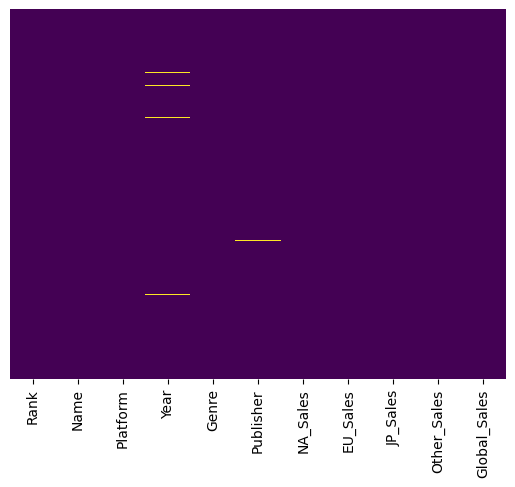

In [ ]:
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

# Limpeza dos Dados

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [ ]:
df.describe(exclude='number').T

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16540,578,Electronic Arts,1351


In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
publisher = df[df['Publisher'].isnull() == True]
publisher

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [ ]:
publisher['Name'].unique()

array(['wwe Smackdown vs. Raw 2006', 'Triple Play 99',
       'Shrek / Shrek 2 2-in-1 Gameboy Advance Video',
       "Bentley's Hackpack",
       'Nicktoons Collection: Game Boy Advance Video Volume 1',
       'SpongeBob SquarePants: Game Boy Advance Video Volume 1',
       'SpongeBob SquarePants: Game Boy Advance Video Volume 2',
       'Sonic the Hedgehog',
       'The Fairly Odd Parents: Game Boy Advance Video Volume 1',
       'The Fairly Odd Parents: Game Boy Advance Video Volume 2',
       'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)',
       'Cartoon Network Collection: Game Boy Advance Video Platinum Edition',
       'The Legend of Zelda: The Minish Cap(weekly JP sales)',
       'Sonic X: Game Boy Advance Video Volume 1',
       'Dora the Explorer: Game Boy Advance Video Volume 1',
       'Cartoon Network Collection: Game Boy Advance Video Volume 1',
       'All Grown Up!: Game Boy Advance Video Volume 1',
       'Nicktoons Collection: Game Boy Advance Video Volume 2',
      

In [ ]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


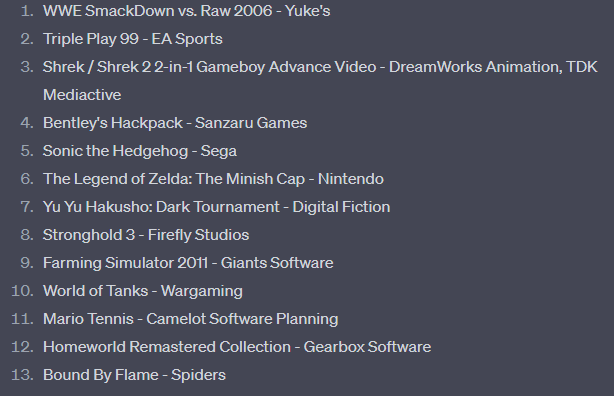

In [ ]:
games = {
    'WWE Smackdown vs. Raw 2006': 'Yuke\'s',
    'Triple Play 99': 'EA Sports',
    'Shrek / Shrek 2 2-in-1 Gameboy Advance Video': 'Activision / TDK Mediactive',
    'Bentley\'s Hackpack': 'Sanzaru Games',
    'Sonic the Hedgehog': 'Sega',
    'The Legend of Zelda: The Minish Cap(weekly JP sales)': 'Nintendo',
    'Stronghold 3': 'Firefly Studios',
    'Farming Simulator 2011': 'Giants Software',
    'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': 'Banpresto',
    'Action Man-Operation Extreme': 'Hasbro Interactive',
    'Monster Hunter Frontier Online': 'Capcom',
    'World of Tanks': 'Wargaming',
    'Mario Tennis': 'Camelot Software Planning',
    'Homeworld Remastered Collection': 'Gearbox Software',
    'Brothers in Arms: Furious 4': 'Gearbox Software',
    'Bound By Flame': 'Spiders'
}

In [ ]:
df['Publisher'] = df['Name'].map(games).fillna(df['Publisher'])

In [ ]:
df['Publisher'] = df['Publisher'].fillna('Unknown')

In [ ]:
year = df[df['Year'].isnull() == True]
year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
year['Name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99',
       'LEGO Harry Potter: Years 5-7', 'Adventure', 'Combat',
       'NASCAR Thunder 2003', 'Hitman 2: Silent Assassin',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'Yakuza 4', 'Wheel of Fortune',
       'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'Madden NFL 11',
       'WarioWare: Twisted!', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Advance Wars: Days of Ruin',
       'Me

In [ ]:
game_release_years = {
    'Madden NFL 2004': 2003,
    'FIFA Soccer 2004': 2003,
    'LEGO Batman: The Videogame': 2008,
    'WWE Smackdown vs. Raw 2006': 2005,
    'Space Invaders': 1978,
    'Rock Band': 2007,
    "Frogger's Adventures: Temple of the Frog": 2001,
    'LEGO Indiana Jones: The Original Adventures': 2008,
    'Call of Duty 3': 2006,
    'Call of Duty: Black Ops': 2010,
    'Triple Play 99': 1998,
    'LEGO Harry Potter: Years 5-7': 2011,
    'Adventure': 1980,
    'Combat': 1977,
    'NASCAR Thunder 2003': 2002,
    'Hitman 2: Silent Assassin': 2002,
    'Legacy of Kain: Soul Reaver': 1999,
    'Donkey Kong Land III': 1997,
    'Air-Sea Battle': 1977,
    'Suikoden III': 2002
}

In [ ]:
df['Year'] = df['Name'].map(game_release_years).fillna(df['Year'])

In [ ]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983.,   nan, 1978., 1977., 2020., 2017.])

# Visualização

In [ ]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

## Utilizando o Seaborn

In [ ]:
translation_dict = {
    'Action': 'Ação',
    'Sports': 'Esportes',
    'Misc': 'Diversos',
    'Role-Playing': 'RPG',
    'Shooter': 'Tiro',
    'Adventure': 'Aventura',
    'Racing': 'Corrida',
    'Platform': 'Plataforma',
    'Simulation': 'Simulação',
    'Fighting': 'Luta',
    'Strategy': 'Estratégia',
    'Puzzle': 'Quebra-cabeça'
}

([<matplotlib.axis.XTick at 0x7fbeebfcb9d0>,
 [Text(0, 0, 'Ação'),
  Text(1, 0, 'Esportes'),
  Text(2, 0, 'Diversos'),
  Text(3, 0, 'RPG'),
  Text(4, 0, 'Tiro'),
  Text(5, 0, 'Aventura'),
  Text(6, 0, 'Corrida'),
  Text(7, 0, 'Plataforma'),
  Text(8, 0, 'Simulação'),
  Text(9, 0, 'Luta'),
  Text(10, 0, 'Estratégia'),
  Text(11, 0, 'Quebra-cabeça')])

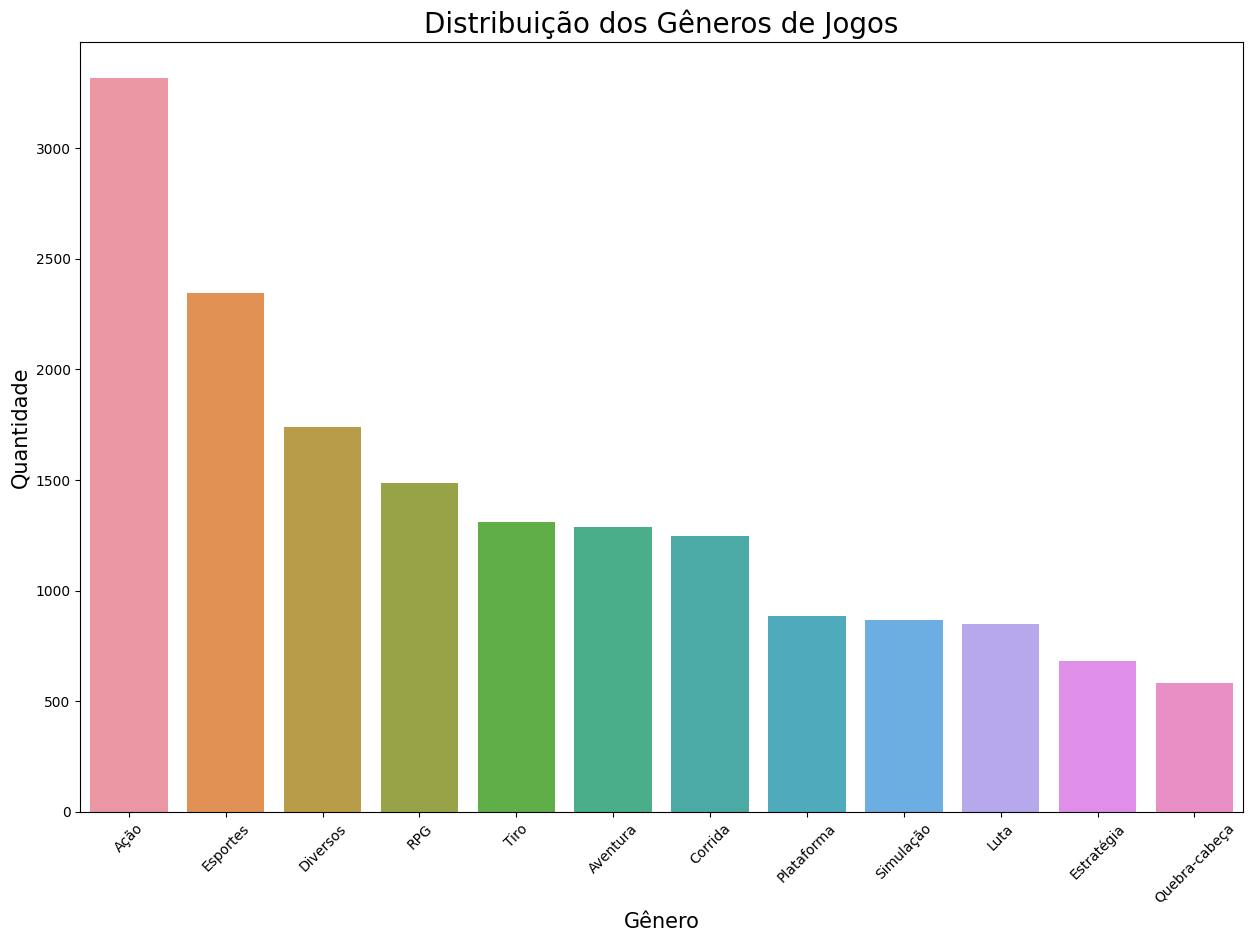

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)

plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.title('Distribuição dos Gêneros de Jogos', fontsize=20)
locs, labels = plt.xticks()
labels = [translation_dict.get(item.get_text(), item.get_text()) for item in plt.gca().get_xticklabels()]#Pedi ajuda ao GPT
plt.xticks(ticks=locs, labels=labels, rotation=45)

In [ ]:
df['Platform'].unique()




array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

([<matplotlib.axis.XTick at 0x7fbee9b1bbb0>,
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

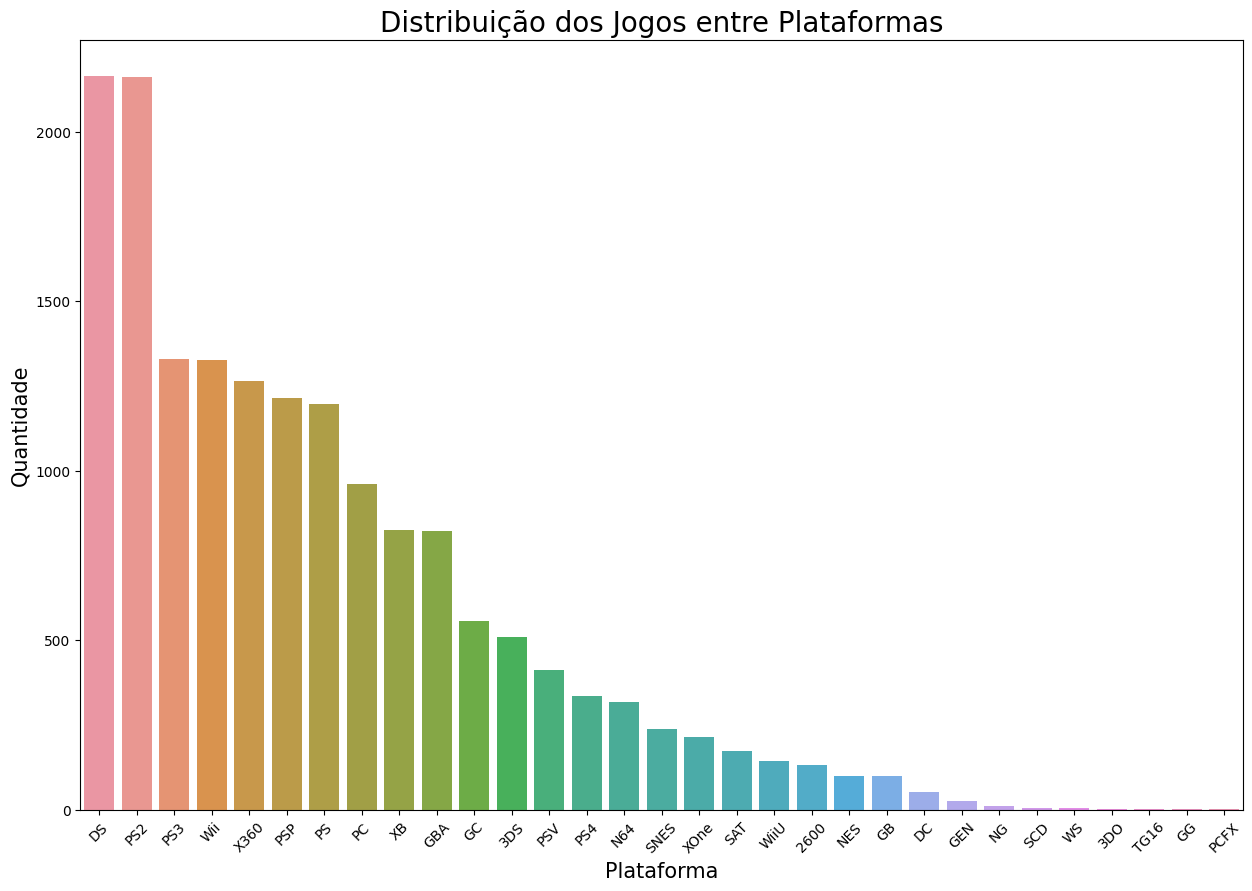

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=df, order = df['Platform'].value_counts().index)

plt.xlabel('Plataforma', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.title('Distribuição dos Jogos entre Plataformas', fontsize=20)
locs, labels = plt.xticks()
labels = [translation_dict.get(item.get_text(), item.get_text()) for item in plt.gca().get_xticklabels()]#Pedi ajuda ao GPT
plt.xticks(ticks=locs, labels=labels, rotation=45)

In [ ]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Unknown', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', 'Camelot Software Planning', '989 Studios',
       'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic',
       'Tecmo Koei',

([<matplotlib.axis.XTick at 0x7fbee8244790>,
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Take-Two Interactive'),
  Text(2, 0, 'Microsoft Game Studios'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Activision')])

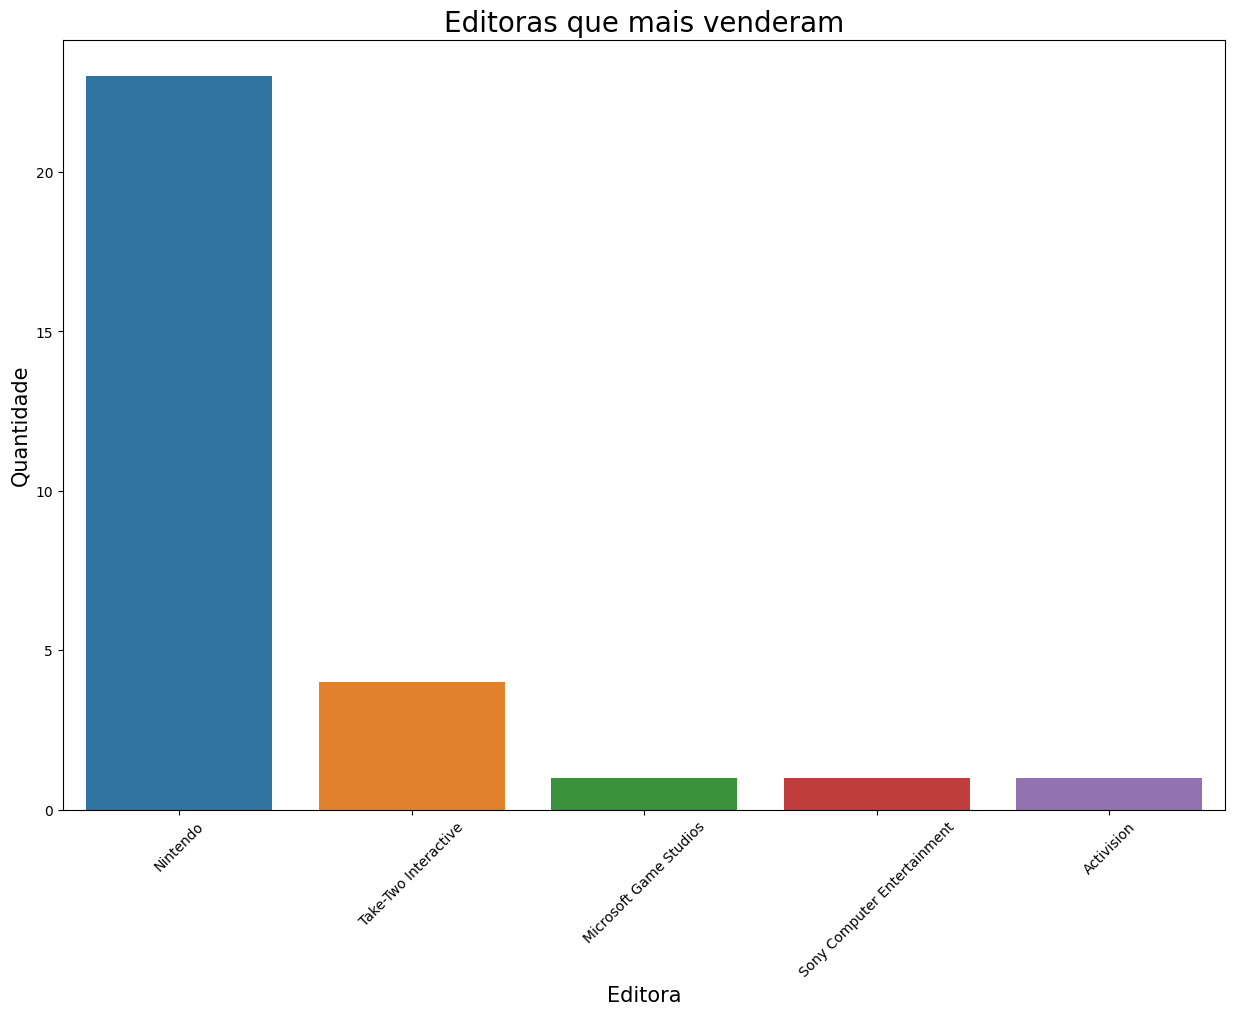

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df.head(30), order = df['Publisher'].head(30).value_counts().index)

plt.xlabel('Editora', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.title('Editoras que mais venderam', fontsize=20)
locs, labels = plt.xticks()
labels = [translation_dict.get(item.get_text(), item.get_text()) for item in plt.gca().get_xticklabels()]#Pedi ajuda ao GPT
plt.xticks(ticks=locs, labels=labels, rotation=45)

https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/notebook#3.-Exploratory-Analysis link da base.

Preciso de um grafico que mostra a principal publisher dentro do periodo de 1980 ate 2016, tipo com o passar dos anos, quais as 3 publisher vendeu mais.

Verificar com o passar dos anos em qual posiçao entre as publisher que mais venderam ficou a Nintendo.  

comparar as regioes do mundo por faturamento, qual regiao do mundo vendeu mais.

qual o numero de vendas por genero de jogo.

qual genero vendeu mais por plataforma.

distribuir qual genero de jogo vendeu mais a cada ano.



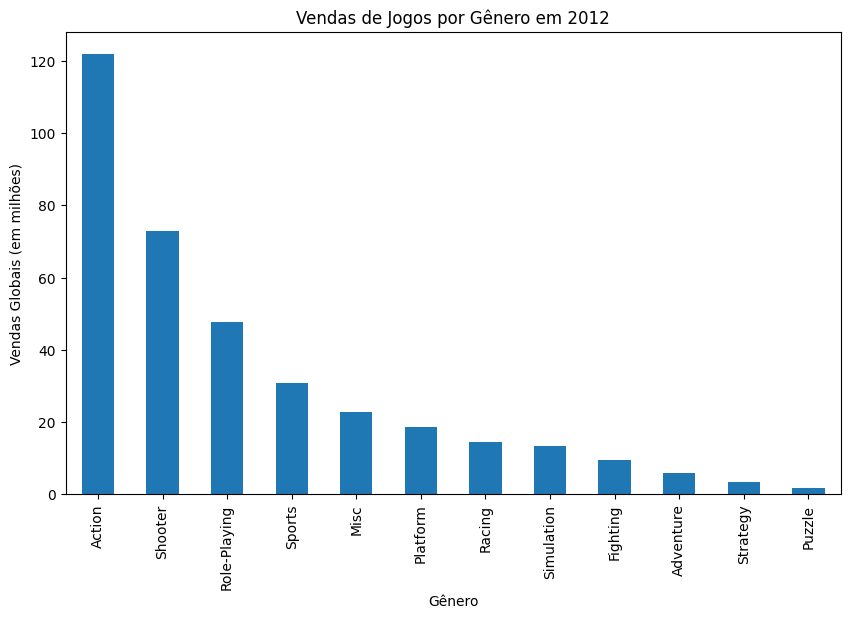

In [ ]:

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

ano_interesse = 2012
df_ano = df[df['Year'] == ano_interesse]

vendas_genero = df_ano.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
vendas_genero.plot(kind='bar')
plt.title(f'Vendas de Jogos por Gênero em {ano_interesse}')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

<ipython-input-30-e9bd89dfd4e7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sales = nintendo_df.groupby("Year").sum()["Global_Sales"]


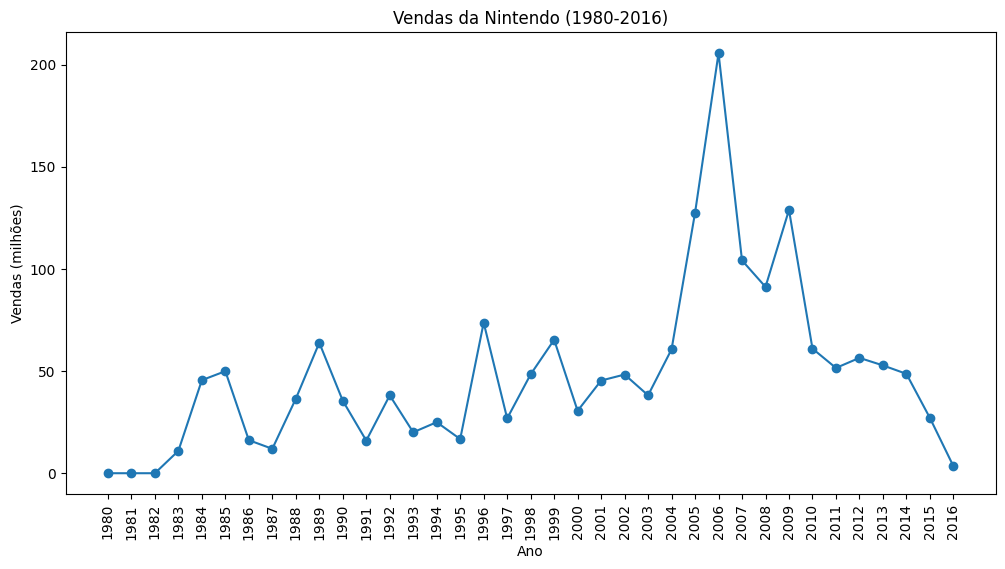

In [ ]:
# Filtrar os dados da Nintendo
nintendo_df = df[df["Publisher"] == "Nintendo"]

# Agrupar as vendas por ano
yearly_sales = nintendo_df.groupby("Year").sum()["Global_Sales"]

# Criar uma lista de anos a partir de 1980 até 2016
years = range(1980, 2017)

# Criar uma lista das vendas da Nintendo para cada ano
sales = [yearly_sales[year] if year in yearly_sales.index else 0 for year in years]

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Plotar o gráfico de linha
plt.plot(years, sales, marker='o')

# Configurar o título e os rótulos dos eixos
plt.title('Vendas da Nintendo (1980-2016)')
plt.xlabel('Ano')
plt.ylabel('Vendas (milhões)')

# Configurar a escala do eixo y em milhões
plt.ticklabel_format(style='plain', axis='y', scilimits=(0, 0), useOffset=False)

# Configurar os ticks do eixo x para exibir todos os anos
plt.xticks(range(1980, 2017), rotation=90)

# Exibir o gráfico
plt.show()

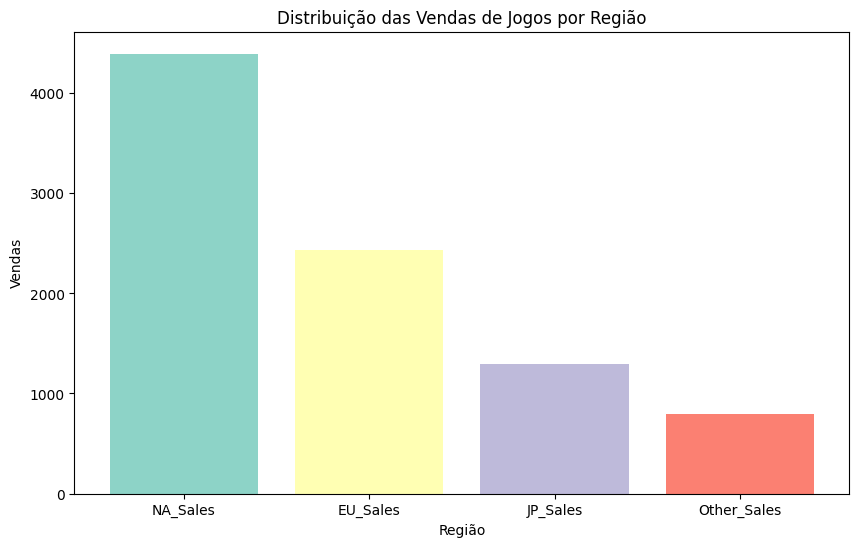

In [ ]:
# Calcular as vendas por região
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
regions = region_sales.index
sales = region_sales.values
colors = plt.cm.Set3(range(len(regions)))

ax.bar(regions, sales, color=colors)

ax.set_xlabel('Região')
ax.set_ylabel('Vendas')
ax.set_title('Distribuição das Vendas de Jogos por Região')

plt.show()



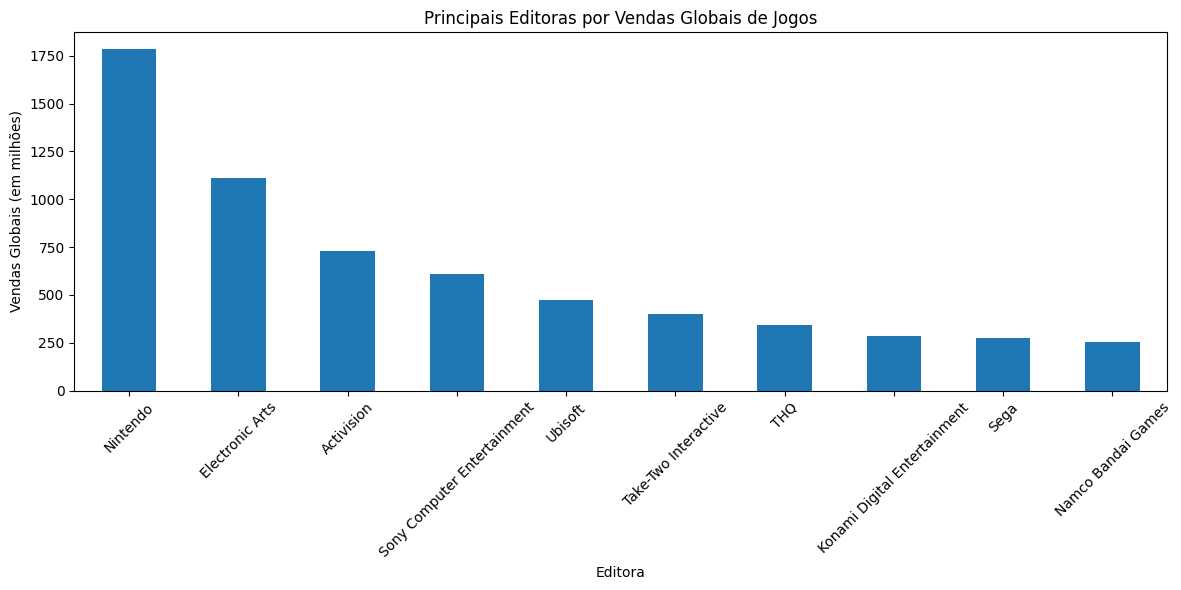

In [ ]:
# Contar as vendas por editora
vendas_por_editora = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
vendas_por_editora.plot(kind='bar')
plt.xlabel('Editora')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Principais Editoras por Vendas Globais de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

<ipython-input-54-980ad135d029>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(unique_publishers))


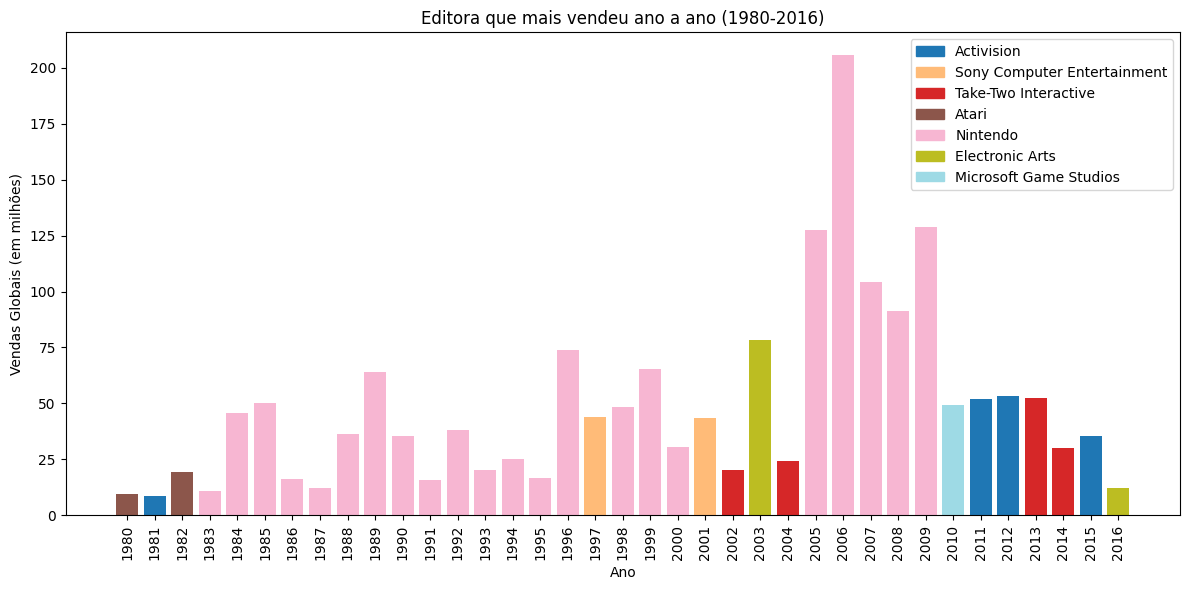

In [ ]:
# Filtrar apenas as informações relevantes para o gráfico
relevant_data = df[['Year', 'Publisher', 'Global_Sales']]

# Criar uma lista com os anos de 1980 a 2016
years = list(range(1980, 2017))

# Inicializar listas vazias para armazenar as editoras que mais venderam e as vendas correspondentes em cada ano
top_publishers = []
top_sales = []

# Para cada ano, encontrar a editora que mais vendeu e suas vendas
for year in years:
    year_data = relevant_data[relevant_data['Year'] == year]
    top_publisher = year_data.loc[year_data['Global_Sales'].idxmax(), 'Publisher']
    top_sales_value = year_data[year_data['Publisher'] == top_publisher]['Global_Sales'].sum()
    top_publishers.append(top_publisher)
    top_sales.append(top_sales_value)

# Identificar as editoras únicas que fazem parte do gráfico
unique_publishers = list(set(top_publishers))

# Definir uma paleta de cores para as editoras
color_palette = plt.cm.get_cmap('tab20', len(unique_publishers))

# Criar um dicionário para mapear cada editora a uma cor
publisher_color_map = {publisher: color_palette(i) for i, publisher in enumerate(unique_publishers)}

# Criar o gráfico de barras com cores diferentes para cada editora
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(years)), top_sales, color=[publisher_color_map[publisher] for publisher in top_publishers])
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Editora que mais vendeu ano a ano (1980-2016)')
plt.xticks(range(len(years)), years, rotation='vertical')

# Adicionar legenda com as cores correspondentes às editoras
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=publisher_color_map[publisher], label=publisher) for publisher in unique_publishers]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

<ipython-input-63-1f85e43a7a11>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(set(relevant_data['Genre'])))


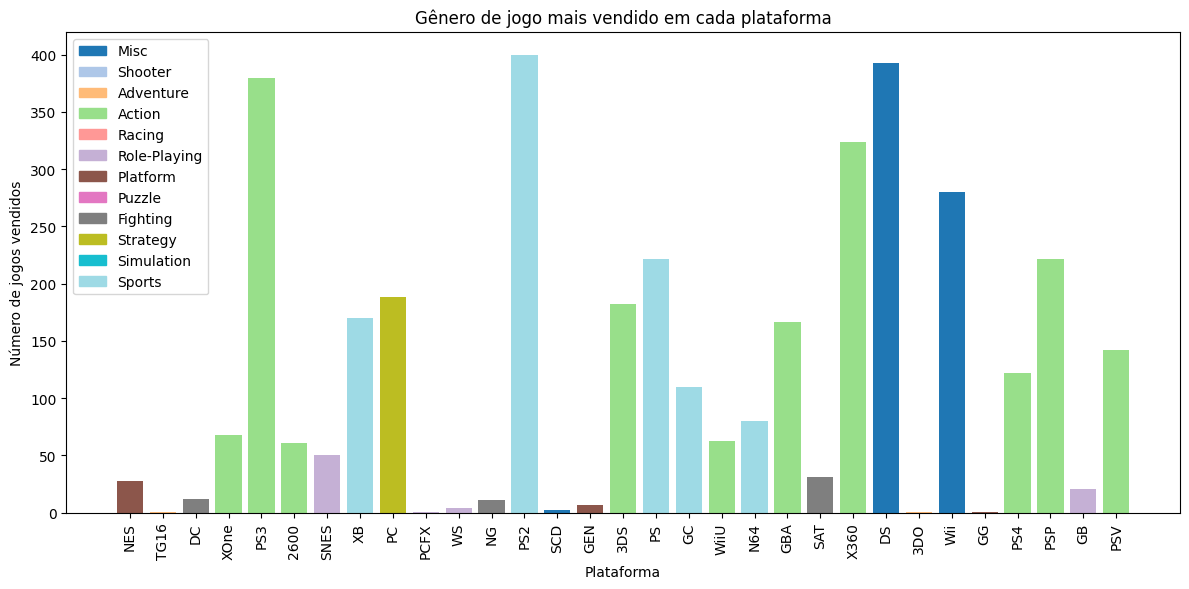

In [ ]:
# Filtrar apenas as colunas relevantes para o gráfico
relevant_data = df[['Platform', 'Genre']]

# Calcular o gênero mais vendido em cada plataforma
top_genres = relevant_data.groupby('Platform')['Genre'].agg(lambda x: x.value_counts().idxmax())

# Identificar as plataformas únicas
platforms = list(set(relevant_data['Platform']))

# Definir uma paleta de cores para os gêneros
color_palette = plt.cm.get_cmap('tab20', len(set(relevant_data['Genre'])))

# Criar um dicionário para mapear cada gênero a uma cor
genre_color_map = {genre: color_palette(i) for i, genre in enumerate(set(relevant_data['Genre']))}

# Criar o gráfico de barras com cores diferentes para cada gênero
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(platforms)), [relevant_data[relevant_data['Platform'] == platform]['Genre'].value_counts().max() for platform in platforms], color=[genre_color_map[top_genres[platform]] for platform in platforms])
plt.xlabel('Plataforma')
plt.ylabel('Número de jogos vendidos')
plt.title('Gênero de jogo mais vendido em cada plataforma')
plt.xticks(range(len(platforms)), platforms, rotation='vertical')

# Adicionar legenda com as cores correspondentes aos gêneros
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=genre_color_map[genre], label=genre) for genre in set(relevant_data['Genre'])]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

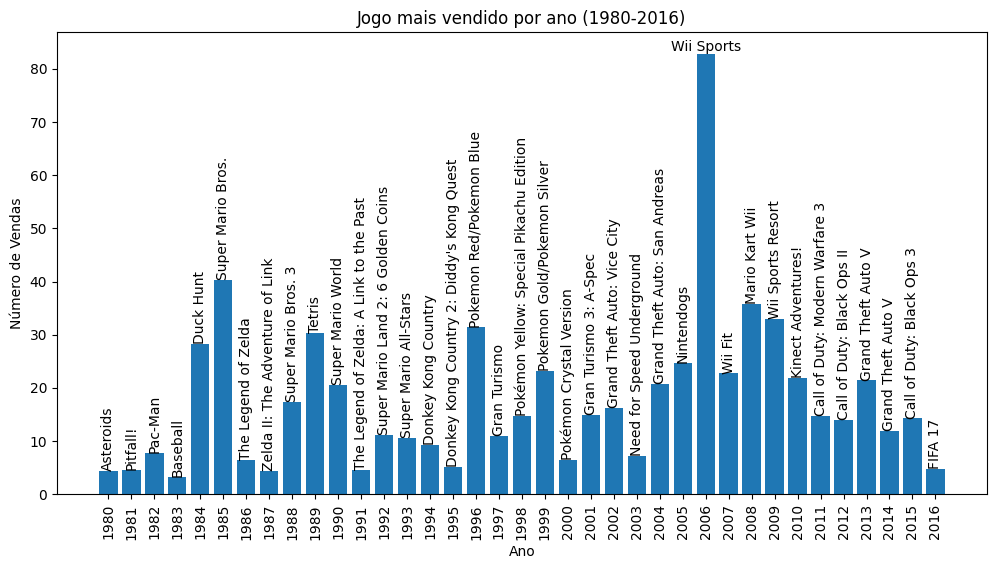

In [ ]:
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2016)]

max_sales_per_year = df.groupby('Year')['Global_Sales'].idxmax()
best_selling_games = df.loc[max_sales_per_year, ['Year', 'Name', 'Global_Sales']]
best_selling_games = best_selling_games.sort_values('Year')

plt.figure(figsize=(12, 6))
plt.bar(best_selling_games['Year'], best_selling_games['Global_Sales'])
plt.xlabel('Ano')
plt.ylabel('Número de Vendas')
plt.title('Jogo mais vendido por ano (1980-2016)')

for i, game in best_selling_games.iterrows():
    if game['Year'] == 2006:
        plt.text(game['Year'], game['Global_Sales'], game['Name'], ha='center', va='bottom', rotation=00)
    else:
        plt.text(game['Year'], game['Global_Sales'], game['Name'], ha='center', va='bottom', rotation=90)

plt.xticks(best_selling_games['Year'], rotation=90)
plt.show()

<ipython-input-81-b8818d832f66>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(unique_genres))


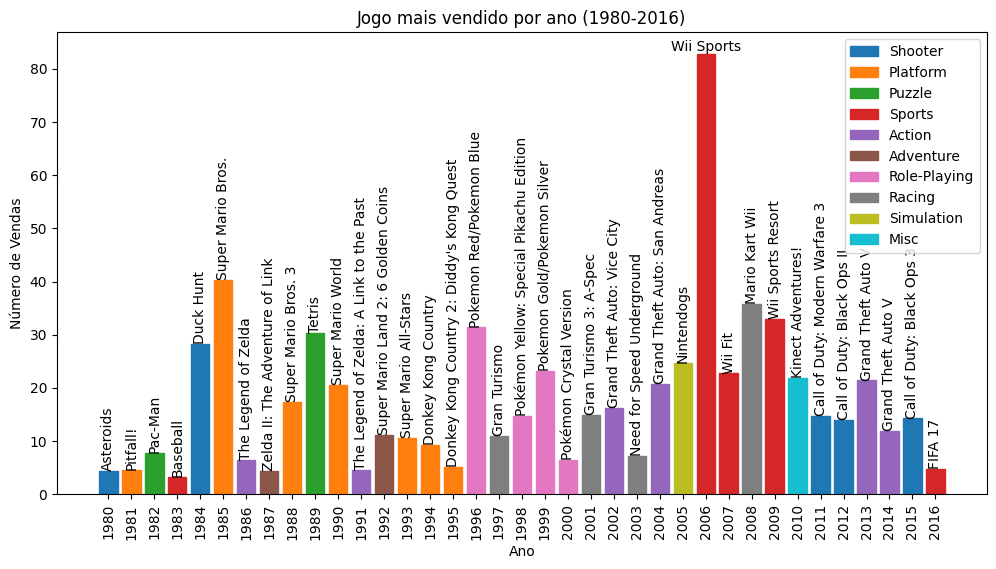

In [ ]:

df = df[(df['Year'] >= 1980) & (df['Year'] <= 2016)]

max_sales_per_year = df.groupby('Year')['Global_Sales'].idxmax()
best_selling_games = df.loc[max_sales_per_year, ['Year', 'Name', 'Global_Sales', 'Genre']]
best_selling_games = best_selling_games.sort_values('Year')

# Obter cores únicas para cada gênero
unique_genres = best_selling_games['Genre'].unique()
color_palette = plt.cm.get_cmap('tab10', len(unique_genres))
genre_colors = {genre: color_palette(i) for i, genre in enumerate(unique_genres)}

plt.figure(figsize=(12, 6))

bars = plt.bar(best_selling_games['Year'], best_selling_games['Global_Sales'])
plt.xlabel('Ano')
plt.ylabel('Número de Vendas')
plt.title('Jogo mais vendido por ano (1980-2016)')

for i, game in best_selling_games.iterrows():
    if game['Year'] == 2006:
        plt.text(game['Year'], game['Global_Sales'], game['Name'], ha='center', va='bottom', rotation=00)
    else:
        plt.text(game['Year'], game['Global_Sales'], game['Name'], ha='center', va='bottom', rotation=90)

plt.xticks(best_selling_games['Year'], rotation=90)

# Criar a legenda com cores diferentes para cada gênero
handles = []
labels = []
for genre in unique_genres:
    handles.append(plt.Rectangle((0, 0), 1, 1, color=genre_colors[genre]))
    labels.append(genre)

plt.legend(handles, labels)

# Pintar cada barra de acordo com o gênero de jogo correspondente
for bar, genre in zip(bars, best_selling_games['Genre']):
    color = genre_colors[genre]
    bar.set_color(color)

plt.show()

<ipython-input-83-d6bcd3bcb4a3>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(unique_genres))


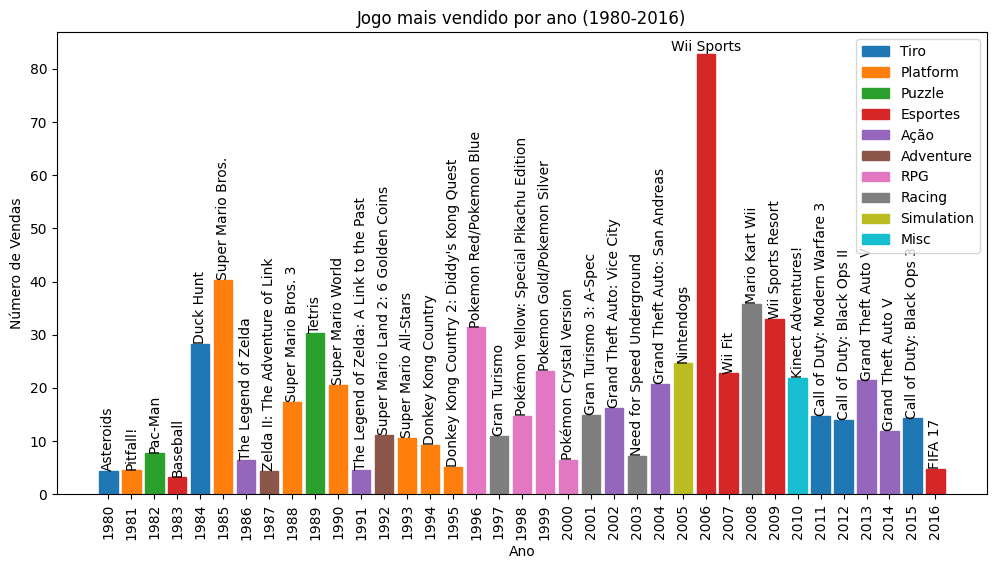

In [ ]:
# Mapeamento de tradução de gêneros de jogo
genre_translation = {
    'Action': 'Ação',
    'Sports': 'Esportes',
    'Shooter': 'Tiro',
    'Role-Playing': 'RPG',
    # Adicione outros gêneros e suas traduções, se necessário
}

df = df[(df['Year'] >= 1980) & (df['Year'] <= 2016)]

max_sales_per_year = df.groupby('Year')['Global_Sales'].idxmax()
best_selling_games = df.loc[max_sales_per_year, ['Year', 'Name', 'Global_Sales', 'Genre']]
best_selling_games = best_selling_games.sort_values('Year')

# Obter cores únicas para cada gênero
unique_genres = best_selling_games['Genre'].unique()
color_palette = plt.cm.get_cmap('tab10', len(unique_genres))
genre_colors = {genre: color_palette(i) for i, genre in enumerate(unique_genres)}

plt.figure(figsize=(12, 6))

bars = plt.bar(best_selling_games['Year'], best_selling_games['Global_Sales'])
plt.xlabel('Ano')
plt.ylabel('Número de Vendas')
plt.title('Jogo mais vendido por ano (1980-2016)')

for i, game in best_selling_games.iterrows():
    if game['Year'] == 2006:
        plt.text(game['Year'], game['Global_Sales'], game['Name'], ha='center', va='bottom', rotation=00)
    else:
        plt.text(game['Year'], game['Global_Sales'], game['Name'], ha='center', va='bottom', rotation=90)

plt.xticks(best_selling_games['Year'], rotation=90)

# Criar a legenda com cores diferentes para cada gênero
handles = []
labels = []
for genre in unique_genres:
    translated_genre = genre_translation.get(genre, genre)
    handles.append(plt.Rectangle((0, 0), 1, 1, color=genre_colors[genre]))
    labels.append(translated_genre)

plt.legend(handles, labels)

# Pintar cada barra de acordo com o gênero de jogo correspondente
for bar, genre in zip(bars, best_selling_games['Genre']):
    color = genre_colors[genre]
    bar.set_color(color)

plt.show()